In [3]:
import matplotlib.pyplot as plt
import pandas as pd 

# Read in the data
data = pd.read_excel('PFI_2025_ex1_data.xlsx')
# Data types:
# TransportType: {1,2,4,6} (1=walk, 2=bike, 4=car, 6=pulic transport)

# Variables in the data
# UniqueID: int
# Gender: {1, 2}
# Age: int
# Mode: TransportType
# Distance: float
# Alternative: TransportType
# TravelCost: float
# choice: TransportType

# TT{N} (eg. TT1): Travel time for mode N
# TC{N} (eg. TC1): Travel cost for mode N
data


,UniqueID,Gender,Age,PersonalIncome,Mode,Distance,Alternative,TravelCost,TT1,TT2,TT4,TT6,TC1,TC2,TC4,TC6,choice
0,1,2,29,175,4,6.0,4,14.862581,99.083871,45.731017,8.657202,29.08,1.981677,3.963355,14.862581,15.544,4
1,2,2,56,100,1,1.0,1,0.657769,32.888431,15.679276,6.933265,10.00,0.657769,1.315537,5.933265,13.000,1
2,3,1,19,25,6,21.0,6,20.392000,241.280798,111.360368,26.908985,65.44,4.825616,9.651232,36.192120,20.392,6
3,4,1,40,200,4,1.0,4,3.359966,22.399774,10.338357,3.452885,15.45,0.447995,0.895991,3.359966,13.720,4
4,7,1,36,275,4,3.0,4,3.681248,24.541652,11.326916,4.383603,13.01,0.490833,0.981666,3.681248,13.398,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,4846,2,46,125,4,4.5,4,3.222363,21.482423,9.914964,3.305773,15.84,0.429648,0.859297,3.222363,13.772,4
4193,4847,1,42,800,4,8.0,4,2.830194,18.867963,8.708291,2.555804,12.52,0.377359,0.754719,2.830194,13.336,4
4194,4848,1,50,350,4,13.0,4,12.961411,86.409407,39.881265,9.756979,33.97,1.728188,3.456376,12.961411,16.196,4
4195,4849,2,46,125,4,4.5,4,3.222363,21.482423,9.914964,3.305773,15.84,0.429648,0.859297,3.222363,13.772,4


In [4]:
# Calculate the count of each mode and the relative frequency
mode_counts = data['choice'].value_counts()
mode_counts = mode_counts.rename('Count')
mode_counts = mode_counts.reset_index()
mode_counts['Relative Frequency'] = mode_counts['Count'] / mode_counts['Count'].sum()
mode_counts = mode_counts.rename(columns={'index': 'Mode'})
mode_counts

,choice,Count,Relative Frequency
0,4,2297,0.547296
1,2,935,0.222778
2,1,814,0.193948
3,6,151,0.035978


In [5]:
# Calculating model utilities
m1 = {
    "k1": 0, # The default for the model has been set to walking
    "k2": -0.385,
    "k4": 0.119,
    "k6": -1.955,
    "b": -0.043,
    "a": -0.046,
}

# For k_i + b*TT_i + a*TC_i
data["UtilityWalk1"] = m1["k1"] + m1["b"]*data["TT1"] + m1["a"]*data["TC1"]
data["UtilityBike1"] = m1["k2"] + m1["b"]*data["TT2"] + m1["a"]*data["TC2"]
data["UtilityCar1"] = m1["k4"] + m1["b"]*data["TT4"] + m1["a"]*data["TC4"]
data["UtilityPublic1"] = m1["k6"] + m1["b"]*data["TT6"] + m1["a"]*data["TC6"]

# Calculate prediction as the maximum utility
data["Model1MaxPrediction"] = data[["UtilityWalk1", "UtilityBike1", "UtilityCar1", "UtilityPublic1"]].idxmax(axis=1)

data['Model1MaxPrediction'].value_counts()

Model1MaxPrediction
UtilityCar1    4197
Name: count, dtype: int64

In [6]:
import numpy as np
m2 = {
    "k1": 0, # The default for the model has been set to walking
    "k2": 0.110,
    "k4": 1.341,
    "k6": -0.730,
    "b": -0.027,
    "a": -0.449, # For the log price
}

# For k_i + b*TT_i + a*ln(TC_i)
data["UtilityWalk2"] = m2["k1"] + m2["b"]*data["TT1"] + m2["a"]*np.log(data["TC1"])
data["UtilityBike2"] = m2["k2"] + m2["b"]*data["TT2"] + m2["a"]*np.log(data["TC2"])
data["UtilityCar2"] = m2["k4"] + m2["b"]*data["TT4"] + m2["a"]*np.log(data["TC4"])
data["UtilityPublic2"] = m2["k6"] + m2["b"]*data["TT6"] + m2["a"]*np.log(data["TC6"])


In [7]:
# The maximum doesn't yield a lot, lets calculate probabilities for each mode
data["ProbabilityWalk1"] = np.exp(data["UtilityWalk1"]) / np.exp(data[["UtilityWalk1", "UtilityBike1", "UtilityCar1", "UtilityPublic1"]]).sum(axis=1)
data["ProbabilityBike1"] = np.exp(data["UtilityBike1"]) / np.exp(data[["UtilityWalk1", "UtilityBike1", "UtilityCar1", "UtilityPublic1"]]).sum(axis=1)
data["ProbabilityCar1"] = np.exp(data["UtilityCar1"]) / np.exp(data[["UtilityWalk1", "UtilityBike1", "UtilityCar1", "UtilityPublic1"]]).sum(axis=1)
data["ProbabilityPublic1"] = np.exp(data["UtilityPublic1"]) / np.exp(data[["UtilityWalk1", "UtilityBike1", "UtilityCar1", "UtilityPublic1"]]).sum(axis=1)

data["ProbabilityWalk2"] = np.exp(data["UtilityWalk2"]) / np.exp(data[["UtilityWalk2", "UtilityBike2", "UtilityCar2", "UtilityPublic2"]]).sum(axis=1)
data["ProbabilityBike2"] = np.exp(data["UtilityBike2"]) / np.exp(data[["UtilityWalk2", "UtilityBike2", "UtilityCar2", "UtilityPublic2"]]).sum(axis=1)
data["ProbabilityCar2"] = np.exp(data["UtilityCar2"]) / np.exp(data[["UtilityWalk2", "UtilityBike2", "UtilityCar2", "UtilityPublic2"]]).sum(axis=1)
data["ProbabilityPublic2"] = np.exp(data["UtilityPublic2"]) / np.exp(data[["UtilityWalk2", "UtilityBike2", "UtilityCar2", "UtilityPublic2"]]).sum(axis=1)

data

,UniqueID,Gender,Age,PersonalIncome,Mode,Distance,Alternative,TravelCost,TT1,TT2,...,UtilityCar2,UtilityPublic2,ProbabilityWalk1,ProbabilityBike1,ProbabilityCar1,ProbabilityPublic1,ProbabilityWalk2,ProbabilityBike2,ProbabilityCar2,ProbabilityPublic2
0,1,2,29,175,4,6.0,4,14.862581,99.083871,45.731017,...,-0.104527,-2.747070,0.025569,0.157493,0.777582,0.039357,0.042564,0.146982,0.756599,0.053855
1,2,2,56,100,1,1.0,1,0.657769,32.888431,15.679276,...,0.354324,-2.151662,0.188820,0.261263,0.509379,0.040538,0.185004,0.240760,0.530915,0.043320
2,3,1,19,25,6,21.0,6,20.392000,241.280798,111.360368,...,-0.996932,-3.850679,0.000338,0.049113,0.905642,0.044908,0.001778,0.048540,0.897936,0.051746
3,4,1,40,200,4,1.0,4,3.359966,22.399774,10.338357,...,0.703615,-2.323016,0.224803,0.251705,0.500190,0.023302,0.206705,0.234095,0.533344,0.025856
4,7,1,36,275,4,3.0,4,3.681248,24.541652,11.326916,...,0.637483,-2.246472,0.216601,0.254350,0.501245,0.027804,0.200667,0.234445,0.534976,0.029912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,4846,2,46,125,4,4.5,4,3.222363,21.482423,9.914964,...,0.726362,-2.335244,0.229405,0.251671,0.496517,0.022407,0.209955,0.234626,0.530581,0.024838
4193,4847,1,42,800,4,8.0,4,2.830194,18.867963,8.708291,...,0.804878,-2.231160,0.239999,0.248425,0.486982,0.024594,0.217662,0.234166,0.523052,0.025119
4194,4848,1,50,350,4,13.0,4,12.961411,86.409407,39.881265,...,-0.072766,-2.897549,0.040842,0.189792,0.741031,0.028335,0.059333,0.170410,0.727123,0.043134
4195,4849,2,46,125,4,4.5,4,3.222363,21.482423,9.914964,...,0.726362,-2.335244,0.229405,0.251671,0.496517,0.022407,0.209955,0.234626,0.530581,0.024838


In [8]:
# Print probabilities for the first row with model 2
first_row_probabilities = data.loc[0, ['ProbabilityWalk2', 'ProbabilityBike2', 'ProbabilityCar2', 'ProbabilityPublic2']]

first_row_probabilities

ProbabilityWalk2      0.042564
ProbabilityBike2      0.146982
ProbabilityCar2       0.756599
ProbabilityPublic2    0.053855
Name: 0, dtype: object

In [16]:

# Calculate the predicted distribution of modes
predicted_walking_2 = data['ProbabilityWalk2'].sum()
predicted_biking_2 = data['ProbabilityBike2'].sum()
predicted_car_2 = data['ProbabilityCar2'].sum()
predicted_public_2 = data['ProbabilityPublic2'].sum()

total = predicted_walking_2 + predicted_biking_2 + predicted_car_2 + predicted_public_2

predicted_distribution_2 = pd.DataFrame({
    'Mode': ['Walking', 'Biking', 'Car', 'Public Transport'],
    'Predicted Distribution': [predicted_walking_2, predicted_biking_2, predicted_car_2, predicted_public_2] / total
})

print(predicted_distribution_2.to_markdown(index=False))

| Mode             |   Predicted Distribution |
|:-----------------|-------------------------:|
| Walking          |                0.193519  |
| Biking           |                0.222669  |
| Car              |                0.547886  |
| Public Transport |                0.0359261 |


In [ ]:
# Calculate the value of time
# VTT = ( (delta Utility) / (delta time) ) / ( (delta Utility) / (delta cost) )
# From calculations in report:
# VTT = TravelCost * b/a

data['VTT2'] = data['TravelCost'] * m2['b'] / m2['a']

# Summary statistics for the VTT
data['VTT2'].describe()

count    4197.000000
mean        0.424377
std         0.668317
min         0.002250
25%         0.043212
50%         0.161587
75%         0.389523
max         5.253802
Name: VTT2, dtype: float64

In [ ]:
# Calculate aggregate direct elasticity for each mode of travel for both price and time
# and print it as a table

# Time direct elasticity (b * t_{ni} * (1 - P_{ni}))
data["TimeElasticityWalk2"] = m2["b"] * data["TT1"] * (1 - data["ProbabilityWalk2"])
data["TimeElasticityBike2"] = m2["b"] * data["TT2"] * (1 - data["ProbabilityBike2"])
data["TimeElasticityCar2"] = m2["b"] * data["TT4"] * (1 - data["ProbabilityCar2"])
data["TimeElasticityPublic2"] = m2["b"] * data["TT6"] * (1 - data["ProbabilityPublic2"])

# Price direct elasticity a * (1 - P_{ni})
data["PriceElasticityWalk2"] = m2["a"] * (1 - data["ProbabilityWalk2"])
data["PriceElasticityBike2"] = m2["a"] * (1 - data["ProbabilityBike2"])
data["PriceElasticityCar2"] = m2["a"] * (1 - data["ProbabilityCar2"])
data["PriceElasticityPublic2"] = m2["a"] * (1 - data["ProbabilityPublic2"])
 
# Calculate probability weighted average of the elasticities for each mode
# Time elasticity
time_elasticity_walk = (data["TimeElasticityWalk2"] * data["ProbabilityWalk2"]).sum() / data["ProbabilityWalk2"].sum()
time_elasticity_bike = (data["TimeElasticityBike2"] * data["ProbabilityBike2"]).sum() / data["ProbabilityBike2"].sum()
time_elasticity_car = (data["TimeElasticityCar2"] * data["ProbabilityCar2"]).sum() / data["ProbabilityCar2"].sum()
time_elasticity_public = (data["TimeElasticityPublic2"] * data["ProbabilityPublic2"]).sum() / data["ProbabilityPublic2"].sum()

# Price elasticity
price_elasticity_walk = (data["PriceElasticityWalk2"] * data["ProbabilityWalk2"]).sum() / data["ProbabilityWalk2"].sum()
price_elasticity_bike = (data["PriceElasticityBike2"] * data["ProbabilityBike2"]).sum() / data["ProbabilityBike2"].sum()
price_elasticity_car = (data["PriceElasticityCar2"] * data["ProbabilityCar2"]).sum() / data["ProbabilityCar2"].sum()
price_elasticity_public = (data["PriceElasticityPublic2"] * data["ProbabilityPublic2"]).sum() / data["ProbabilityPublic2"].sum()

# Print the results as a table
elasticities = pd.DataFrame({
    "Mode": ["Walk", "Bike", "Car", "Public"],
    "TimeElasticity": [time_elasticity_walk, time_elasticity_bike, time_elasticity_car, time_elasticity_public],
    "PriceElasticity": [price_elasticity_walk, price_elasticity_bike, price_elasticity_car, price_elasticity_public]
})

# Show the table without the index in a markdown friendly format
print(elasticities.to_markdown(index=False))



| Mode   |   TimeElasticity |   PriceElasticity |
|:-------|-----------------:|------------------:|
| Walk   |       -0.441012  |         -0.33221  |
| Bike   |       -0.315335  |         -0.338125 |
| Car    |       -0.0657483 |         -0.180048 |
| Public |       -0.569098  |         -0.427734 |


In [ ]:
# Generate cross elasticities for each mode of transport
# Time cross elasticity -b * t_{ni} * P_{nj}
data["TimeCrossElasticityWalk2"] = -m2["b"] * data["TT1"] * data["ProbabilityWalk2"]
data["TimeCrossElasticityBike2"] = -m2["b"] * data["TT2"] * data["ProbabilityBike2"]
data["TimeCrossElasticityCar2"] = -m2["b"] * data["TT4"] * data["ProbabilityCar2"]
data["TimeCrossElasticityPublic2"] = -m2["b"] * data["TT6"] * data["ProbabilityPublic2"]

# Price cross elasticity -a * P_{nj}
data["PriceCrossElasticityWalk2"] = -m2["a"] * data["ProbabilityWalk2"]
data["PriceCrossElasticityBike2"] = -m2["a"] * data["ProbabilityBike2"]
data["PriceCrossElasticityCar2"] = -m2["a"] * data["ProbabilityCar2"]
data["PriceCrossElasticityPublic2"] = -m2["a"] * data["ProbabilityPublic2"]

# Calculate probability weighted average of the elasticities for each mode
# Time cross elasticity
time_cross_elasticity_walk = (data["TimeCrossElasticityWalk2"] * data["ProbabilityWalk2"]).sum() / data["ProbabilityWalk2"].sum()
time_cross_elasticity_bike = (data["TimeCrossElasticityBike2"] * data["ProbabilityBike2"]).sum() / data["ProbabilityBike2"].sum()
time_cross_elasticity_car = (data["TimeCrossElasticityCar2"] * data["ProbabilityCar2"]).sum() / data["ProbabilityCar2"].sum()
time_cross_elasticity_public = (data["TimeCrossElasticityPublic2"] * data["ProbabilityPublic2"]).sum() / data["ProbabilityPublic2"].sum()

# Price cross elasticity
price_cross_elasticity_walk = (data["PriceCrossElasticityWalk2"] * data["ProbabilityWalk2"]).sum() / data["ProbabilityWalk2"].sum()
price_cross_elasticity_bike = (data["PriceCrossElasticityBike2"] * data["ProbabilityBike2"]).sum() / data["ProbabilityBike2"].sum()
price_cross_elasticity_car = (data["PriceCrossElasticityCar2"] * data["ProbabilityCar2"]).sum() / data["ProbabilityCar2"].sum()
price_cross_elasticity_public = (data["PriceCrossElasticityPublic2"] * data["ProbabilityPublic2"]).sum() / data["ProbabilityPublic2"].sum()

# Print the results as a table
cross_elasticities = pd.DataFrame({
    "Mode": ["Walk", "Bike", "Car", "Public"],
    "TimeCrossElasticity": [time_cross_elasticity_walk, time_cross_elasticity_bike, time_cross_elasticity_car, time_cross_elasticity_public],
    "PriceCrossElasticity": [price_cross_elasticity_walk, price_cross_elasticity_bike, price_cross_elasticity_car, price_cross_elasticity_public]
})

# Show the table without the index in a markdown friendly format
print(cross_elasticities.to_markdown(index=False))


| Mode   |   TimeCrossElasticity |   PriceCrossElasticity |
|:-------|----------------------:|-----------------------:|
| Walk   |             0.0947405 |              0.11679   |
| Bike   |             0.074305  |              0.110875  |
| Car    |             0.174241  |              0.268952  |
| Public |             0.033231  |              0.0212658 |


In [ ]:
# Make a comparison of male and female transport choices

males = data[data.Gender == 1]
females = data[data.Gender == 2]

# Calculate frequency of each mode of transport for the genders

m_mode_counts = {
    "Walk": males[males["Mode"] == 1].shape[0],
    "Bike": males[males["Mode"] == 2].shape[0],
    "Car": males[males["Mode"] == 4].shape[0],
    "Public": males[males["Mode"] == 6].shape[0],
}
f_mode_counts = {
    "Walk": females[females["Mode"] == 1].shape[0],
    "Bike": females[females["Mode"] == 2].shape[0],
    "Car": females[females["Mode"] == 4].shape[0],
    "Public": females[females["Mode"] == 6].shape[0],
}
m_mode_counts, f_mode_counts


({'Walk': 265, 'Bike': 409, 'Car': 1224, 'Public': 41},
 {'Walk': 549, 'Bike': 526, 'Car': 1073, 'Public': 110})

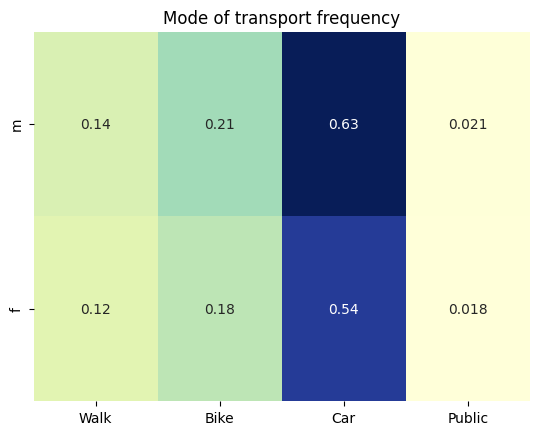

In [ ]:
import seaborn as sns
# Tabulate the frequency of each mode of transport

m_freq = { key: v / males.shape[0] for key, v in m_mode_counts.items() }
f_freq = { key: v / females.shape[0] for key, v in m_mode_counts.items() }

# Plot the frequencies as a heatmap, set the titles for the "m" and "f" columns
sns.heatmap(pd.DataFrame([m_freq, f_freq], index=["m", "f"]),
                         annot=True, cmap="YlGnBu", cbar=False).set_title("Mode of transport frequency")
plt.show()

In [ ]:
m3 = {
    "k1": 0, # Default walk
    "k2": 0.132,
    "k4": 1.410,
    "k6": -1.266,
    "b": -0.026,
    "a": -0.475,
    "c": 0.994,
}


# For k_i + b*TT_i + a*ln(TC_i) + c * Ptfem (gender = 2 and public transport)
data["UtilityWalk3"] = m3["k1"] + m3["b"]*data["TT1"] + m3["a"]*np.log(data["TC1"])
data["UtilityBike3"] = m3["k2"] + m3["b"]*data["TT2"] + m3["a"]*np.log(data["TC2"])
data["UtilityCar3"] = m3["k4"] + m3["b"]*data["TT4"] + m3["a"]*np.log(data["TC4"])
data["UtilityPublic3"] = m3["k6"] + m3["b"]*data["TT6"] + m3["a"]*np.log(data["TC6"]) + m3["c"]*(data.Gender == 2)

data['ProbabilityWalk3'] = np.exp(data["UtilityWalk3"]) / np.exp(data[["UtilityWalk3", "UtilityBike3", "UtilityCar3", "UtilityPublic3"]]).sum(axis=1)
data['ProbabilityBike3'] = np.exp(data["UtilityBike3"]) / np.exp(data[["UtilityWalk3", "UtilityBike3", "UtilityCar3", "UtilityPublic3"]]).sum(axis=1)
data['ProbabilityCar3'] = np.exp(data["UtilityCar3"]) / np.exp(data[["UtilityWalk3", "UtilityBike3", "UtilityCar3", "UtilityPublic3"]]).sum(axis=1)
data['ProbabilityPublic3'] = np.exp(data["UtilityPublic3"]) / np.exp(data[["UtilityWalk3", "UtilityBike3", "UtilityCar3", "UtilityPublic3"]]).sum(axis=1)

data

,UniqueID,Gender,Age,PersonalIncome,Mode,Distance,Alternative,TravelCost,TT1,TT2,...,PriceCrossElasticityCar2,PriceCrossElasticityPublic2,UtilityWalk3,UtilityBike3,UtilityCar3,UtilityPublic3,ProbabilityWalk3,ProbabilityBike3,ProbabilityCar3,ProbabilityPublic3
0,1,2,29,175,4,6.0,4,14.862581,99.083871,45.731017,...,0.339713,0.024181,-2.901054,-1.711125,-0.097039,-2.331325,0.044316,0.145659,0.731685,0.078340
1,2,2,56,100,1,1.0,1,0.657769,32.888431,15.679276,...,0.238381,0.019451,-0.656121,-0.405928,0.383962,-1.750351,0.183536,0.235710,0.519306,0.061447
2,3,1,19,25,6,21.0,6,20.392000,241.280798,111.360368,...,0.403173,0.023234,-7.020921,-3.840235,-0.994333,-4.399633,0.002207,0.053106,0.914334,0.030353
3,4,1,40,200,4,1.0,4,3.359966,22.399774,10.338357,...,0.239472,0.011609,-0.200982,-0.084630,0.744558,-2.911656,0.209904,0.235804,0.540335,0.013957
4,7,1,36,275,4,3.0,4,3.681248,24.541652,11.326916,...,0.240204,0.013431,-0.300049,-0.153710,0.676982,-2.836935,0.204363,0.236568,0.542901,0.016168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,4846,2,46,125,4,4.5,4,3.222363,21.482423,9.914964,...,0.238231,0.011152,-0.157269,-0.053760,0.768245,-1.929593,0.208240,0.230949,0.525423,0.035388
4193,4847,1,42,800,4,8.0,4,2.830194,18.867963,8.708291,...,0.234850,0.011279,-0.027652,0.039254,0.849385,-2.821992,0.220550,0.235811,0.530151,0.013488
4194,4848,1,50,350,4,13.0,4,12.961411,86.409407,39.881265,...,0.326478,0.019367,-2.506505,-1.494018,-0.060620,-3.471983,0.063800,0.175605,0.736300,0.024295
4195,4849,2,46,125,4,4.5,4,3.222363,21.482423,9.914964,...,0.238231,0.011152,-0.157269,-0.053760,0.768245,-1.929593,0.208240,0.230949,0.525423,0.035388


In [ ]:
# Calculate the predicted distribution of modes
predicted_walking_3 = data['ProbabilityWalk2'].sum()
predicted_biking_3 = data['ProbabilityBike2'].sum()
predicted_car_3 = data['ProbabilityCar2'].sum()
predicted_public_3 = data['ProbabilityPublic2'].sum()

predicted_distribution_3 = pd.DataFrame({
    'Mode': ['Walking', 'Biking', 'Car', 'Public Transport'],
    'Predicted Distribution': [predicted_walking_3, predicted_biking_3, predicted_car_3, predicted_public_3]
})


# Mix the predicted_distribution_2 and predicted_distribution_3 
# by making a column for each model and then merging on the mode
predicted_distribution_2['Model'] = 2
predicted_distribution_3['Model'] = 3

predicted_distribution = pd.concat([predicted_distribution_2, predicted_distribution_3])
predicted_distribution = predicted_distribution.pivot(index='Mode', columns='Model', values='Predicted Distribution')

predicted_distribution


Model,2,3
Mode,,
Biking,934.542226,934.542226
Car,2299.477486,2299.477486
Public Transport,150.781988,150.781988
Walking,812.198300,812.198300


In [ ]:
utility_prediction = pd.DataFrame()
utility_prediction["walk"] = m3["k1"] + m3["b"]*data["TT1"] + m3["a"]*np.log(data["TC1"])
utility_prediction["bike"] = m3["k2"] + m3["b"]*data["TT2"] + m3["a"]*np.log(data["TC2"])
utility_prediction["car"] = m3["k4"] + m3["b"]*data["TT4"] + m3["a"]*np.log(data["TC4"])
utility_prediction["public"] = m3["k6"] + m3["b"]*data["TT6"] + m3["a"]*np.log(data["TC6"]) + m3["c"]*(data.Gender == 2)
utility_prediction["green_car"] = m3["k4"] + m3["b"]*data["TT4"]*1.25 + m3["a"]*np.log(data["TC4"]*1.2)

utility_prediction["walk_prob"] = np.exp(utility_prediction["walk"]) / np.exp(utility_prediction).sum(axis=1)
utility_prediction["bike_prob"] = np.exp(utility_prediction["bike"]) / np.exp(utility_prediction).sum(axis=1)
utility_prediction["car_prob"] = np.exp(utility_prediction["car"]) / np.exp(utility_prediction).sum(axis=1)
utility_prediction["public_prob"] = np.exp(utility_prediction["public"]) / np.exp(utility_prediction).sum(axis=1)
utility_prediction["green_car_prob"] = np.exp(utility_prediction["green_car"]) / np.exp(utility_prediction).sum(axis=1)

utility_prediction

,walk,bike,car,public,green_car,walk_prob,bike_prob,car_prob,public_prob,green_car_prob
0,-2.901054,-1.711125,-0.097039,-2.331325,-0.239914,0.027116,0.059146,0.220517,0.018121,0.123298
1,-0.656121,-0.405928,0.383962,-1.750351,0.252293,0.126121,0.126964,0.229972,0.022730,0.148520
2,-7.020921,-3.840235,-0.994333,-4.399633,-1.255844,0.001295,0.012709,0.136846,0.003190,0.058688
3,-0.200982,-0.084630,0.744558,-2.911656,0.635511,0.141396,0.132465,0.260642,0.005801,0.181856
4,-0.300049,-0.153710,0.676982,-2.836935,0.561886,0.137722,0.131391,0.256679,0.006541,0.175995
...,...,...,...,...,...,...,...,...,...,...
4192,-0.157269,-0.053760,0.768245,-1.929593,0.660155,0.141506,0.131795,0.258781,0.015084,0.181838
4193,-0.027652,0.039254,0.849385,-2.821992,0.746170,0.149206,0.135416,0.264944,0.005873,0.189402
4194,-2.506505,-1.494018,-0.060620,-3.471983,-0.210643,0.039052,0.071758,0.223955,0.005695,0.125411
4195,-0.157269,-0.053760,0.768245,-1.929593,0.660155,0.141506,0.131795,0.258781,0.015084,0.181838


In [ ]:
# Calculate the predicted distribution of modes with the model with green car
predicted_walking = utility_prediction['walk_prob'].sum()
predicted_biking = utility_prediction['bike_prob'].sum()
predicted_car = utility_prediction['car_prob'].sum()
predicted_public = utility_prediction['public_prob'].sum()
predicted_green_car = utility_prediction['green_car_prob'].sum()

# Calculate market share 
market_share_walking = predicted_walking / (predicted_walking + predicted_biking + predicted_car + predicted_public + predicted_green_car)
market_share_biking = predicted_biking / (predicted_walking + predicted_biking + predicted_car + predicted_public + predicted_green_car)
market_share_car = predicted_car / (predicted_walking + predicted_biking + predicted_car + predicted_public + predicted_green_car)
market_share_public = predicted_public / (predicted_walking + predicted_biking + predicted_car + predicted_public + predicted_green_car)
market_share_green_car = predicted_green_car / (predicted_walking + predicted_biking + predicted_car + predicted_public + predicted_green_car)

predicted_market_share = pd.DataFrame({
    'Mode': ['Walking', 'Biking', 'Car', 'Public Transport', 'Green Car'],
    'Predicted Market Share': [market_share_walking, market_share_biking, market_share_car, market_share_public, market_share_green_car]
})
    

predicted_market_share

,Mode,Predicted Market Share
0,Walking,0.214999
1,Biking,0.197838
2,Car,0.341606
3,Public Transport,0.017956
4,Green Car,0.227600


In [ ]:
#hide_input
# Calculate market shares for model 3
market_share_walking_3 = predicted_walking_3 / (predicted_walking_3 + predicted_biking_3 + predicted_car_3 + predicted_public_3)
market_share_biking_3 = predicted_biking_3 / (predicted_walking_3 + predicted_biking_3 + predicted_car_3 + predicted_public_3)
market_share_car_3 = predicted_car_3 / (predicted_walking_3 + predicted_biking_3 + predicted_car_3 + predicted_public_3)
market_share_public_3 = predicted_public_3 / (predicted_walking_3 + predicted_biking_3 + predicted_car_3 + predicted_public_3)
market_share_green_car_3 = 0

market_share_3 = pd.DataFrame({
    'Mode': ['Walking', 'Biking', 'Car', 'Public Transport', 'Green Car'],
    'Market Share model 3': [market_share_walking_3, market_share_biking_3, market_share_car_3, market_share_public_3, market_share_green_car_3]
})

# Merge the two dataframes setting them next to each other
market_share = pd.concat([market_share_3, predicted_market_share], axis=1)
# Remove one of the Mode columns
market_share = market_share.loc[:,~market_share.columns.duplicated()]

print(market_share.to_markdown(index=False))

| Mode             |   Market Share model 3 |   Predicted Market Share |
|:-----------------|-----------------------:|-------------------------:|
| Walking          |              0.193519  |                0.214999  |
| Biking           |              0.222669  |                0.197838  |
| Car              |              0.547886  |                0.341606  |
| Public Transport |              0.0359261 |                0.0179565 |
| Green Car        |              0         |                0.2276    |
